In [11]:
from pathlib import Path
import sys

cwd = Path.cwd()
project_root = cwd

if not (project_root / "src").exists():
    project_root = cwd.parent

sys.path.append(str(project_root))

print("Current working directory:", cwd)
print("Using project root:", project_root)
print("src exists:", (project_root / "src").exists())


Current working directory: /Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error/notebooks
Using project root: /Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error
src exists: True


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from src.data import make_synthetic_data
from src.train import gradient_descent

from src.visualize import compute_mse_surface
from src.visualize import plot_mse_surface_contour
from src.visualize import plot_mse_history
from src.visualize import plot_gd_path_on_surface


In [13]:
x, y = make_synthetic_data(n=40, true_w=2.5, true_b=-1.0, noise_std=1.0, seed=42)


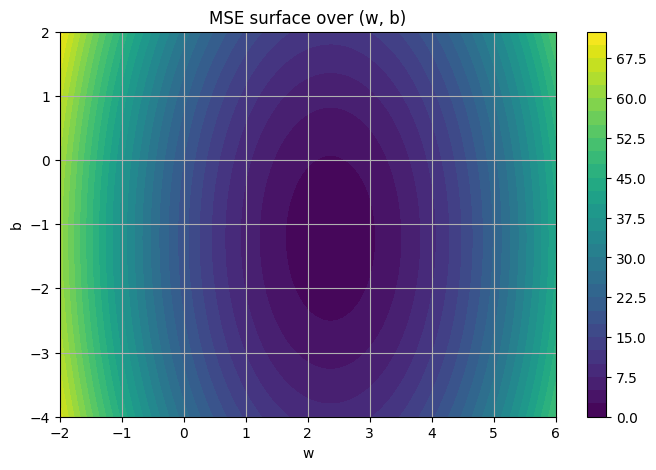

In [14]:
w_grid = np.linspace(-2, 6, 150)
b_grid = np.linspace(-4, 2, 150)

W, B, Z = compute_mse_surface(x=x, y=y, w_grid=w_grid, b_grid=b_grid)

plot_mse_surface_contour(W, B, Z, title="MSE surface over (w, b)")


In [15]:
result = gradient_descent(x=x, y=y, w0=0.0, b0=0.0, lr=0.03, steps=60)

print("Final learned w:", result["w"])
print("Final learned b:", result["b"])
print("Final MSE:", result["history_mse"][-1])


Final learned w: 2.367314206881264
Final learned b: -1.1888828274788192
Final MSE: 0.8306324288143754


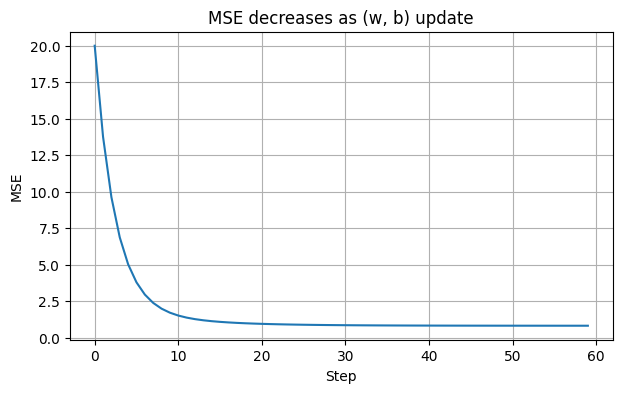

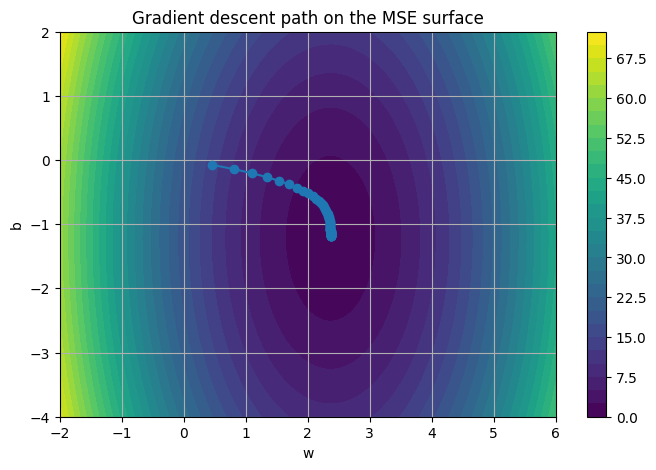

In [25]:
plot_mse_history(history_mse=result["history_mse"], title="MSE decreases as (w, b) update")
plot_gd_path_on_surface(W=W, B=B, Z=Z, history_w=result["history_w"], history_b=result["history_b"], title="Gradient descent path on the MSE surface")


In [26]:
from pathlib import Path
fig_dir = Path(project_root) / "outputs" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)
fig_dir


PosixPath('/Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error/outputs/figures')

In [28]:
import matplotlib.pyplot as plt

plt.savefig(fig_dir / "02_mse_surface_and_gd_path.png", dpi=200, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>